In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:

data = pd.read_csv('..//Dataset//patient_dataset.csv')
data.head()

age  gender  chest_pain_type  blood_pressure  cholesterol  max_heart_rate  \
0   24     1.0                4             250          139             212   
1   29     0.0                4             132          187             147   
2   46     0.0                3             271          185             193   
3   73     NaN                2             102          200             125   
4   49     1.0                3              91          163             192   

   exercise_angina  plasma_glucose  skin_thickness  insulin        bmi  \
0                0           108.0            33.0    109.0  37.999303   
1                0           202.0            42.0      NaN  25.588346   
2                0           149.0            43.0    102.0  37.892029   
3                0           105.0            77.0    165.0  18.660241   
4                0           162.0            31.0    170.0  12.767980   

   diabetes_pedigree  hypertension  heart_disease residence_type  \
0           0.480277             1              1          Urban   
1           0.283986             1              1          Urban   
2           2.472309             1              0          Rural   
3           1.472052             0              1          Rural   
4           0.537627             1              1          Rural   

  smoking_status  
0         Smoker  
1        Unknown  
2     Non-Smoker  
3         Smoker  
4         Smoker

In [7]:
data.info(),data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   object 
 15  smoking_status     6000 non-null   object 
dtypes: float64(6), int64(8),

(None, (6000, 16))

In [5]:
data.isnull().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [10]:
numeric_cols = [
    'age', 'blood_pressure', 'cholesterol', 'max_heart_rate',
    'plasma_glucose', 'skin_thickness', 'insulin',
    'bmi', 'diabetes_pedigree'
]

categorical_cols = [
    'gender', 'chest_pain_type', 'exercise_angina',
    'hypertension', 'heart_disease',
    'residence_type', 'smoking_status'
]
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


C:\Users\sujit\AppData\Local\Temp\ipykernel_24740\2093733620.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\sujit\AppData\Local\Temp\ipykernel_24740\2093733620.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [11]:
print(data.isnull().sum())


age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64


In [20]:
data["residence_type"].unique(),data["smoking_status"].unique()

(array(['Urban', 'Rural'], dtype=object),
 array(['Smoker', 'Unknown', 'Non-Smoker'], dtype=object))

In [21]:
data["residence_type"] = data["residence_type"].map({"Urban": 0, "Rural": 1})
data["smoking_status"] = data["residence_type"].map({"Smoker": 1, "Non-Smoker": -1,"Unknown":0})

In [22]:
columns = data.columns

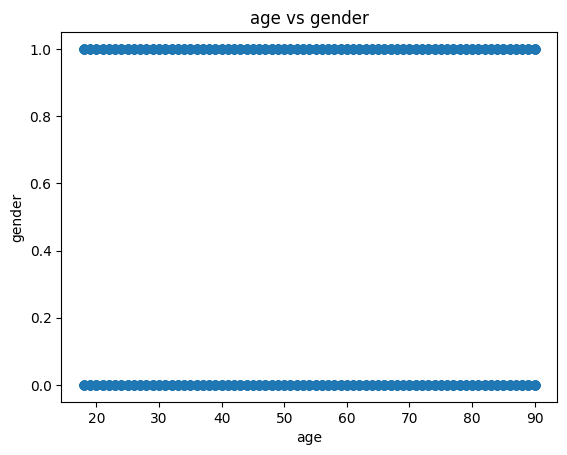

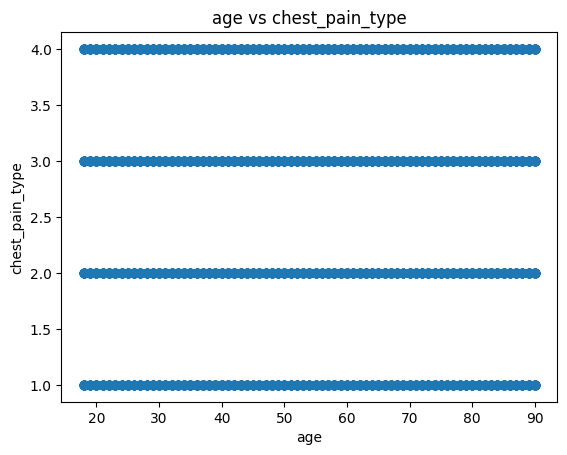

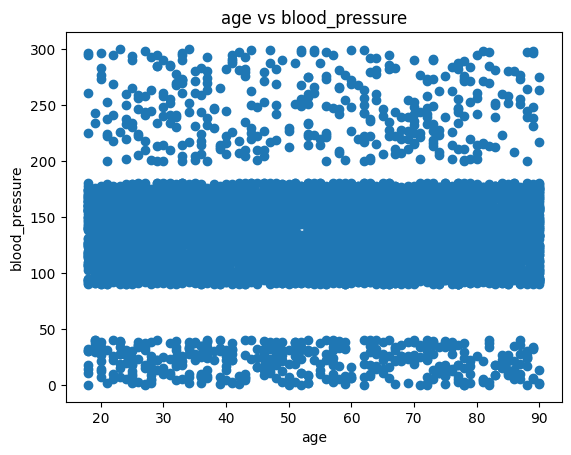

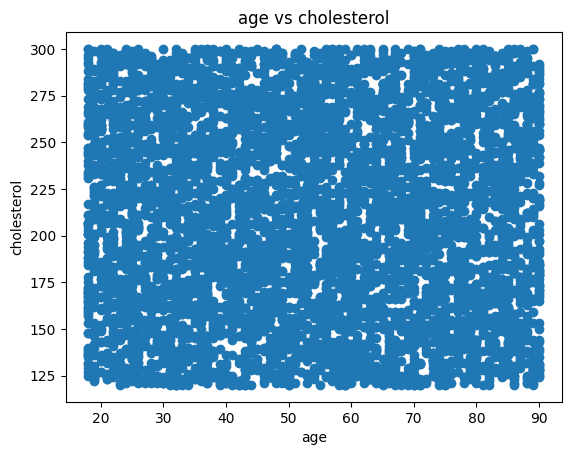

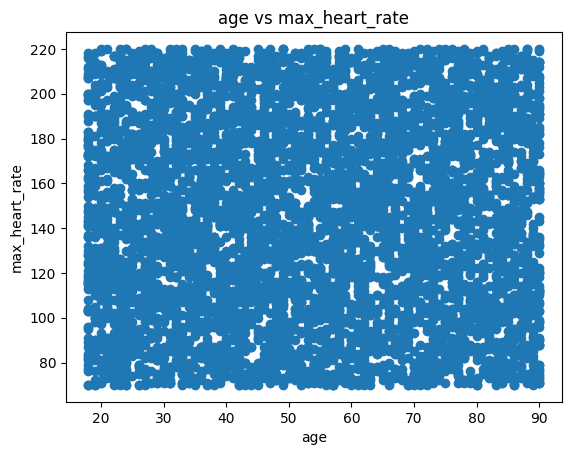

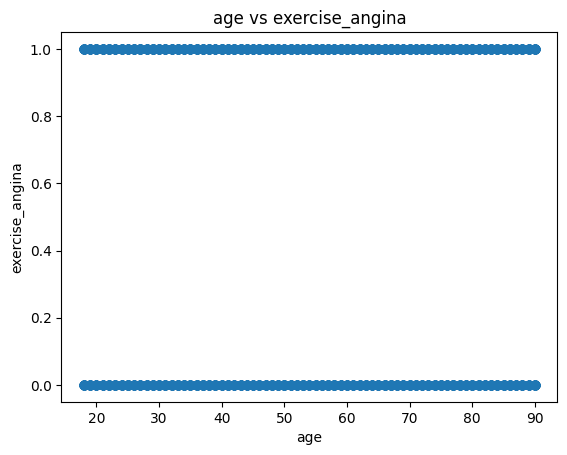

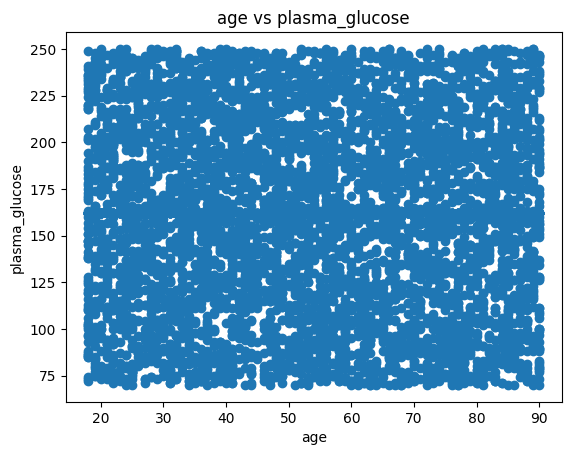

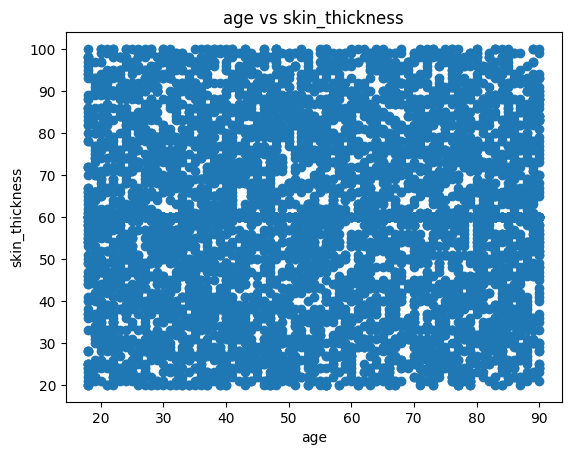

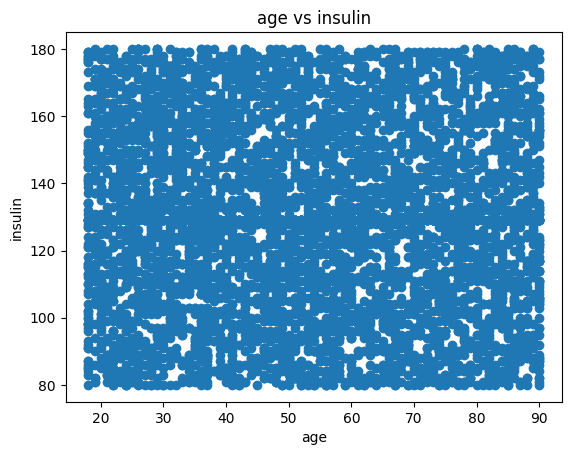

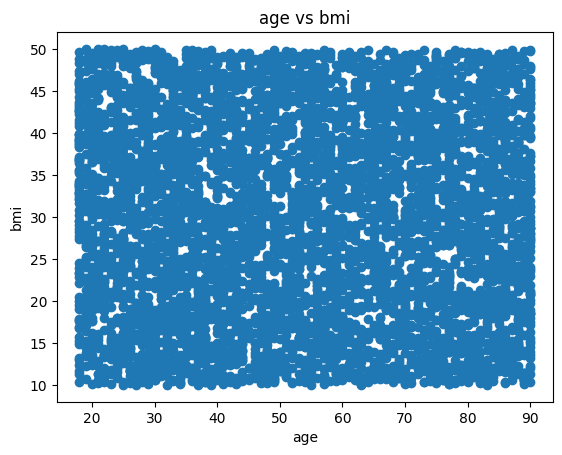

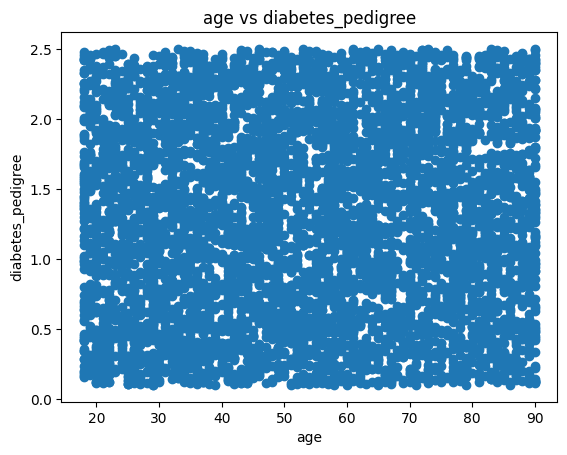

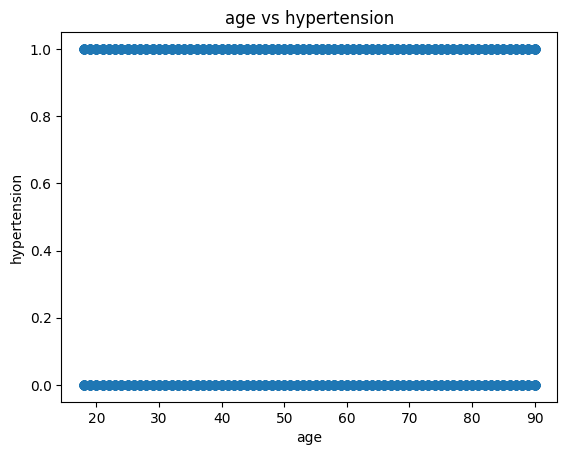

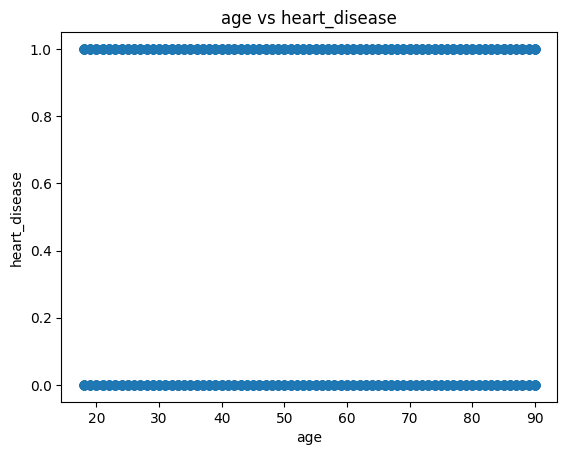

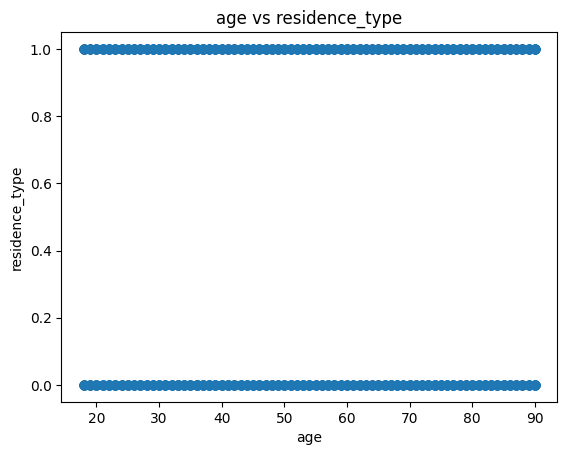

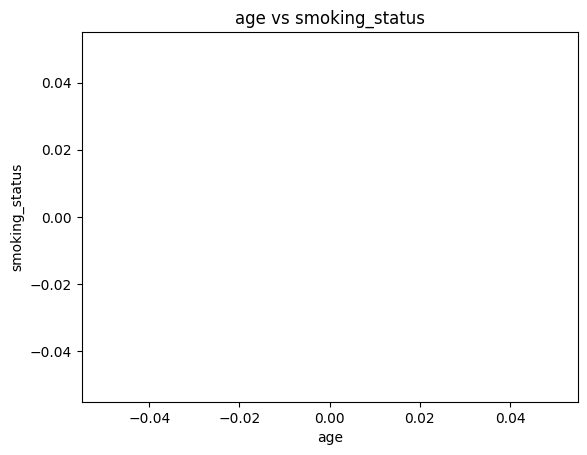

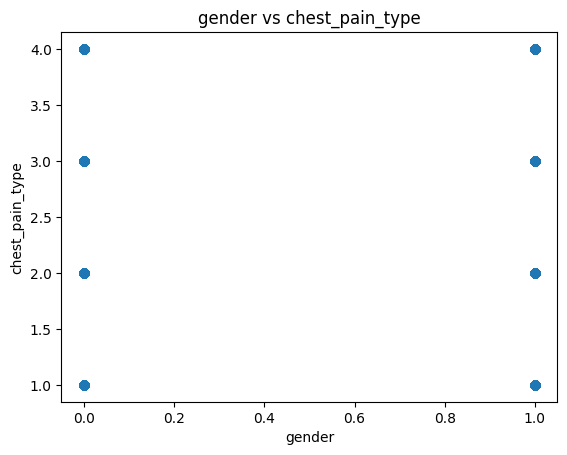

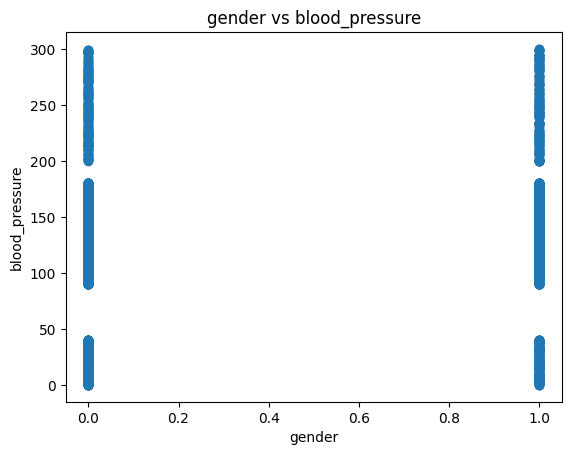

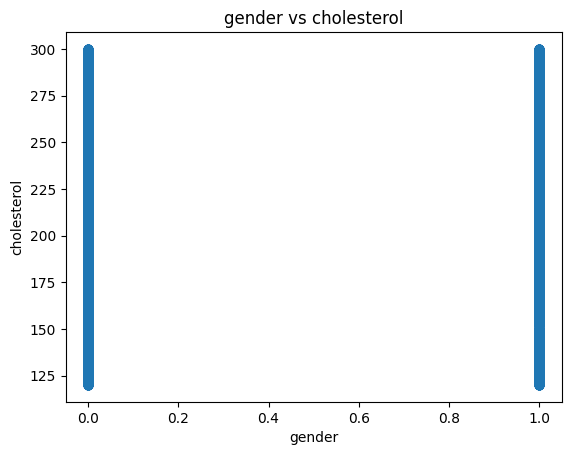

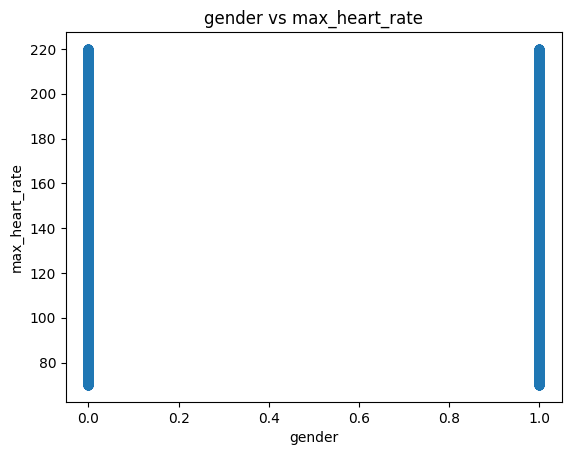

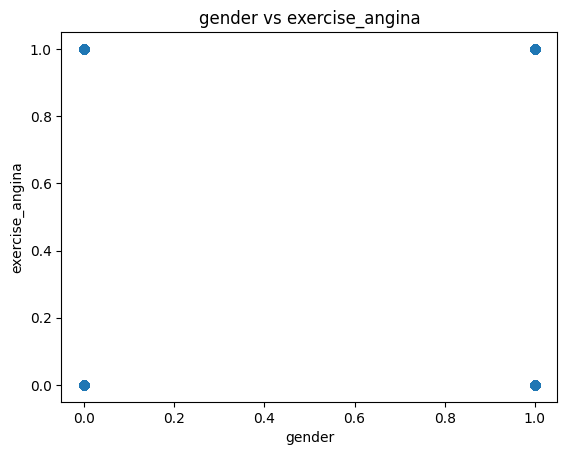

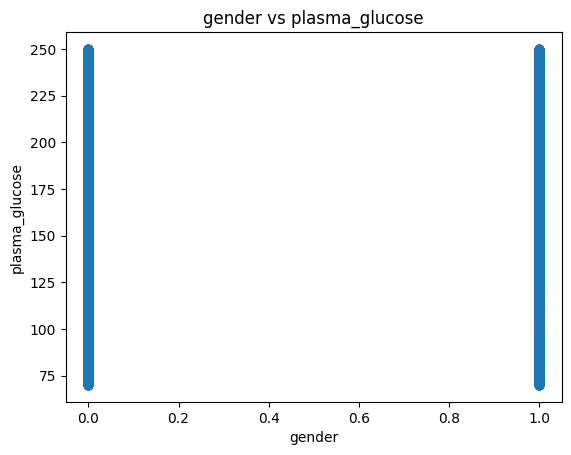

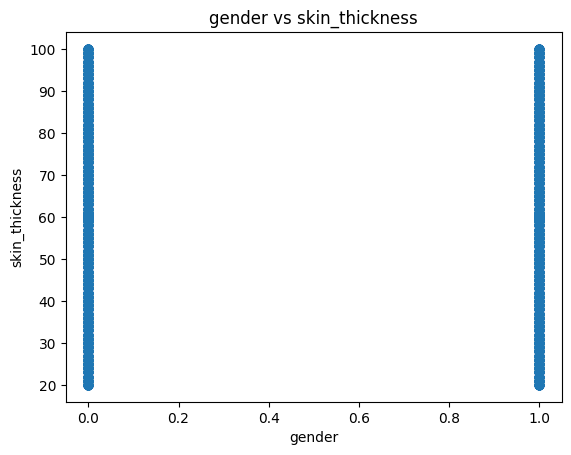

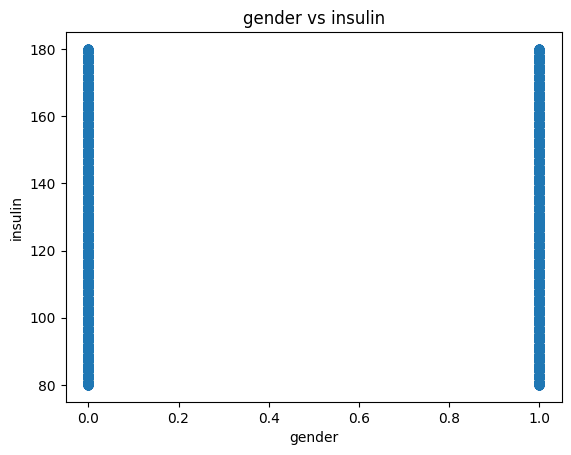

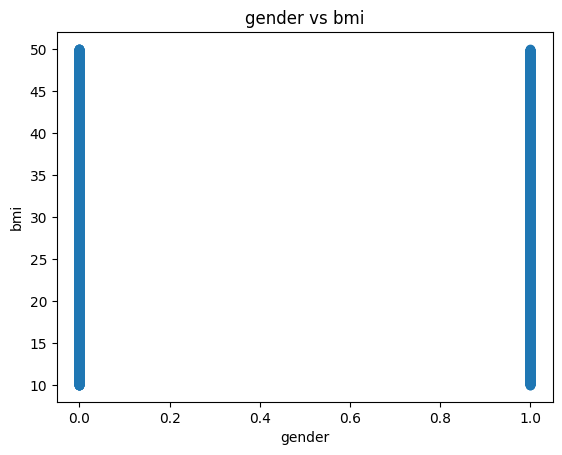

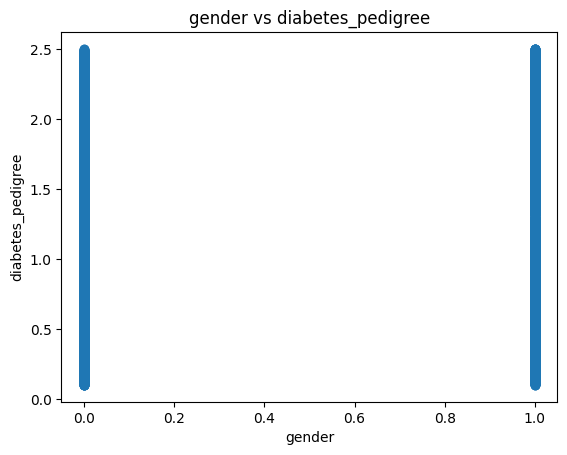

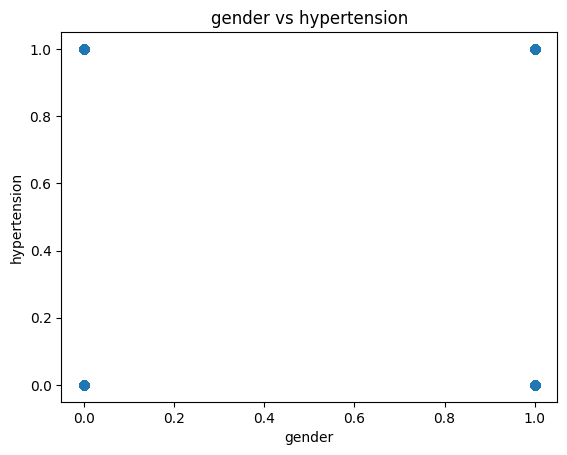

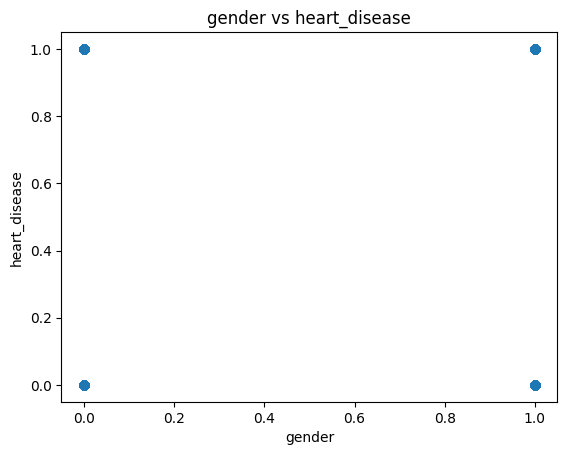

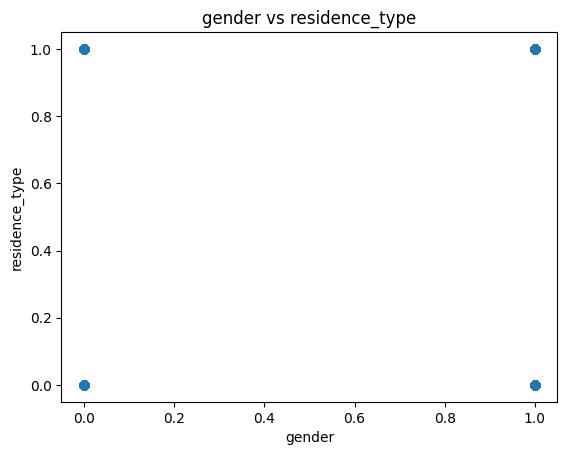

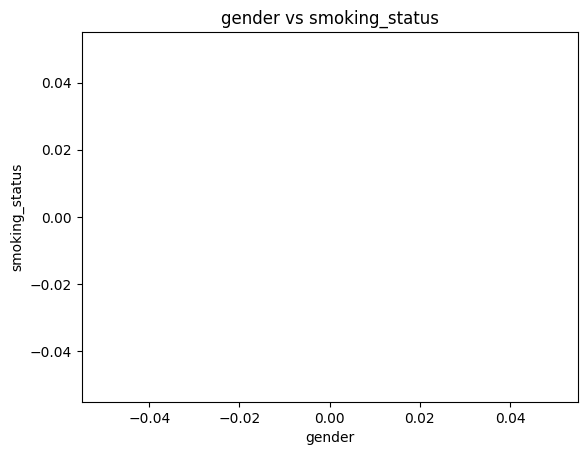

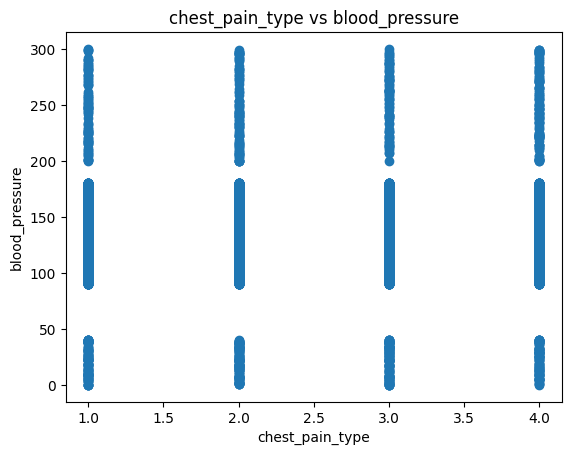

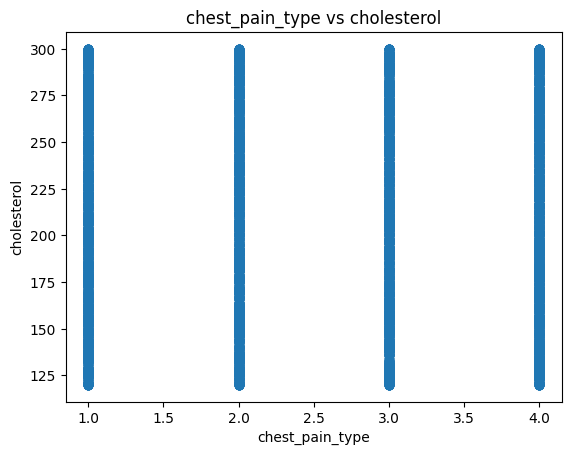

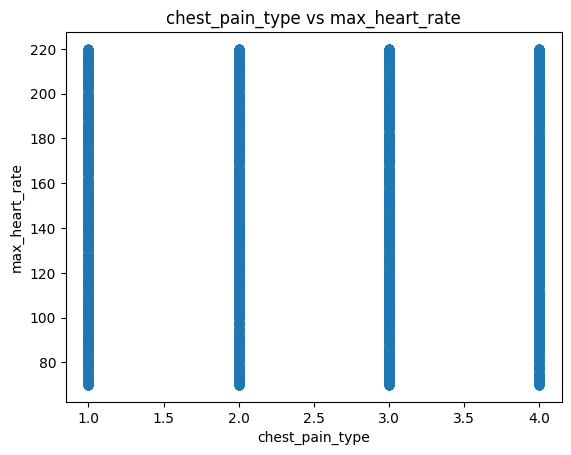

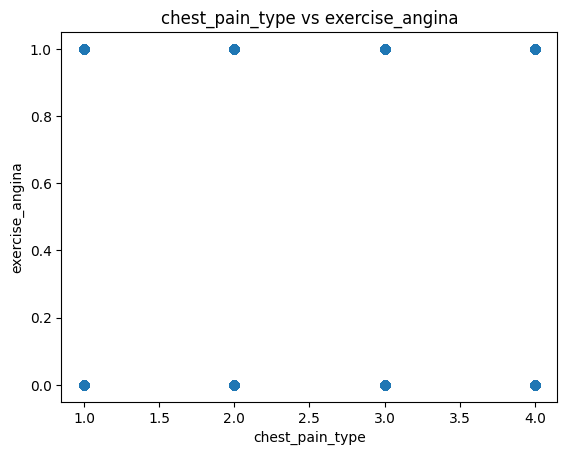

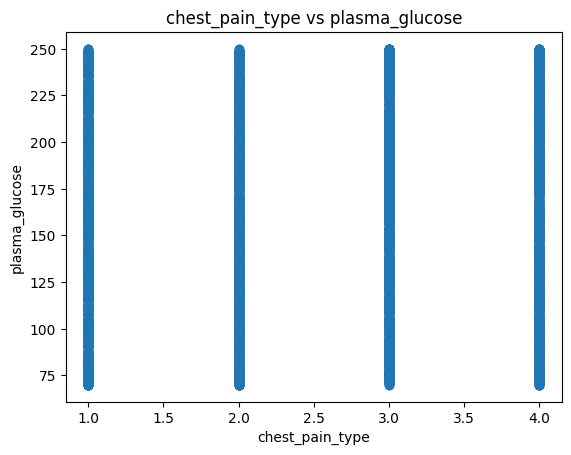

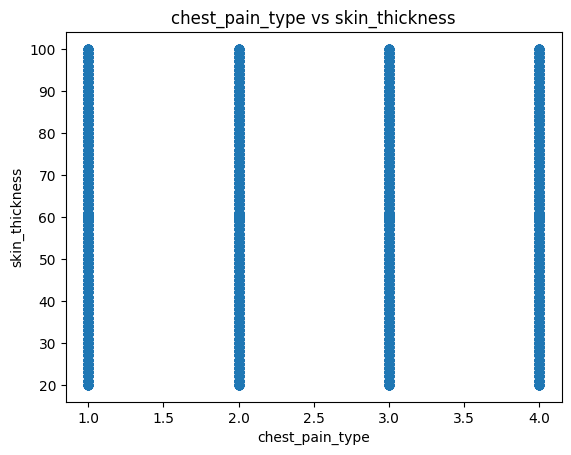

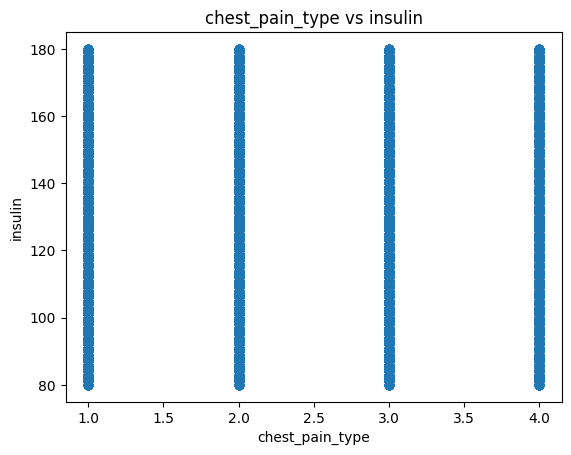

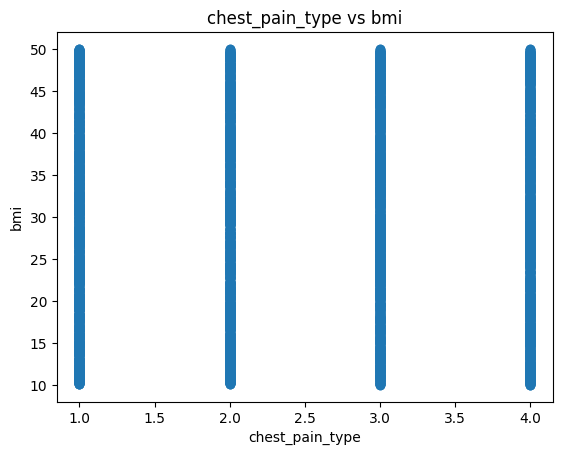

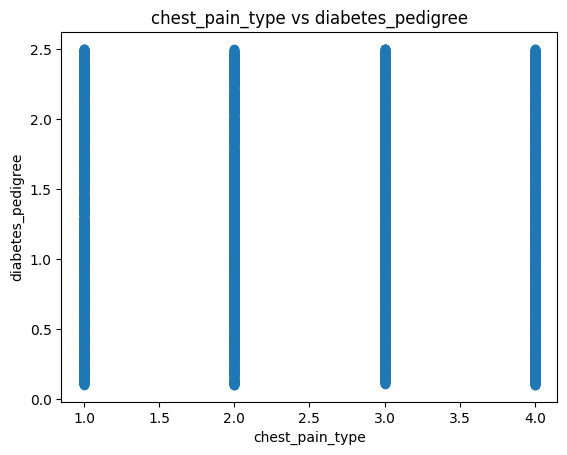

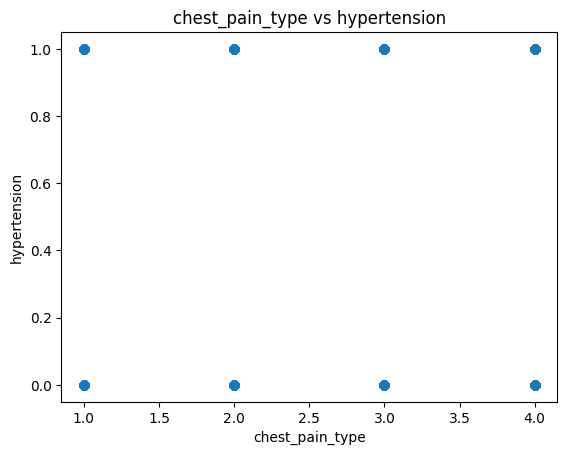

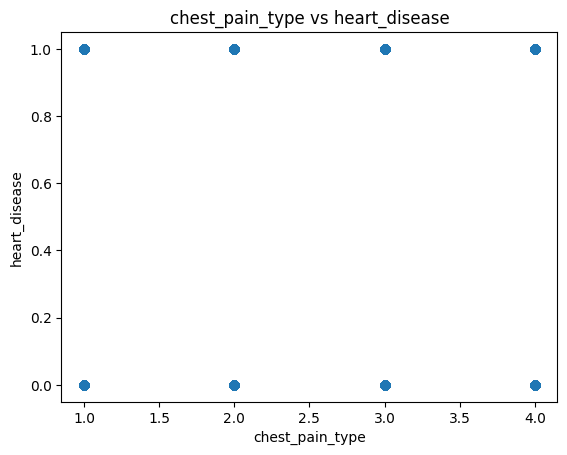

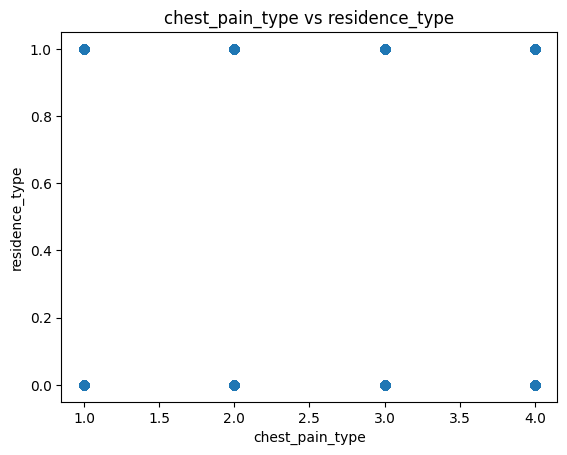

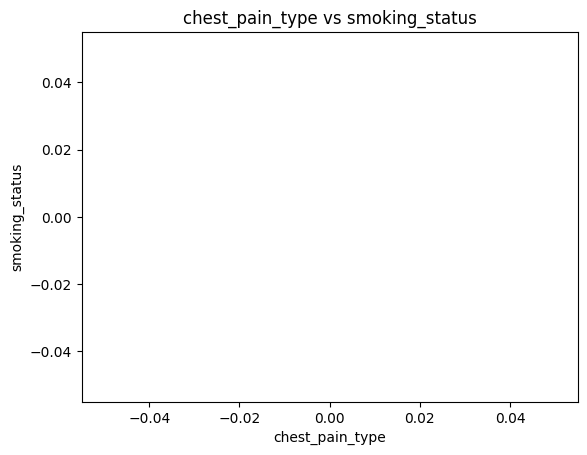

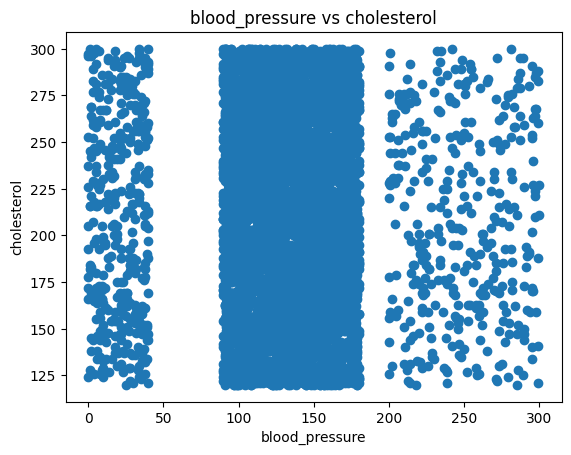

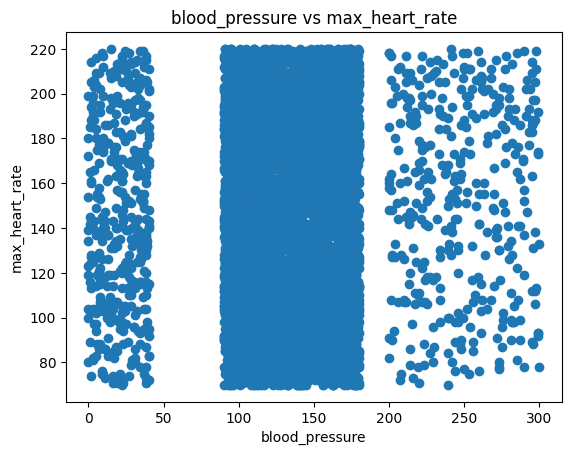

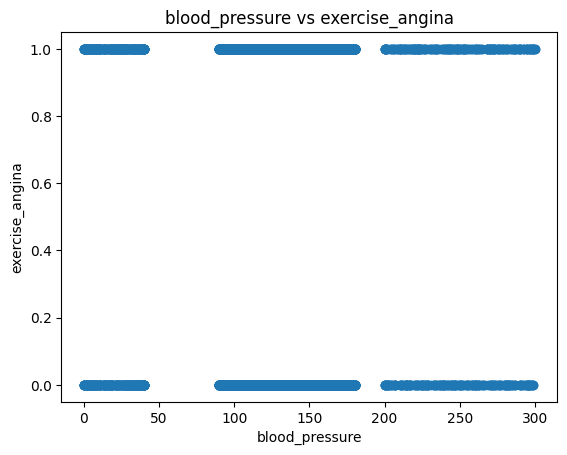

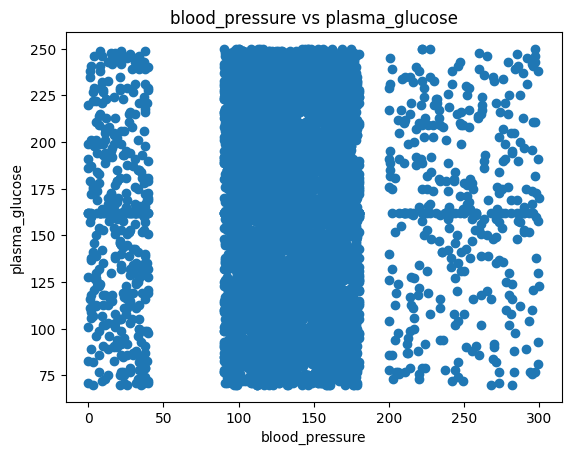

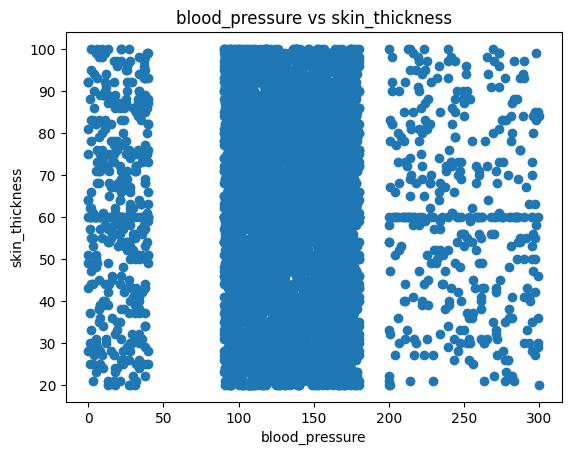

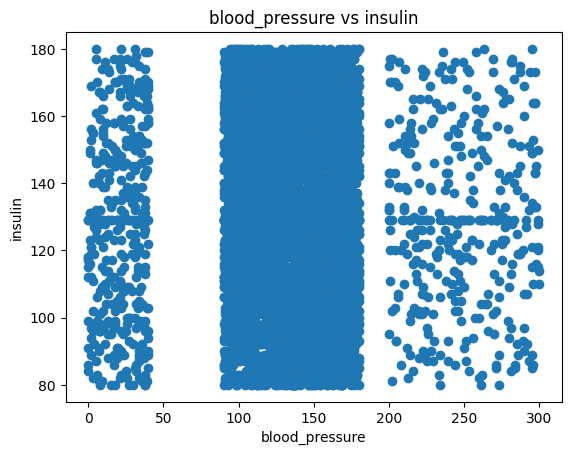

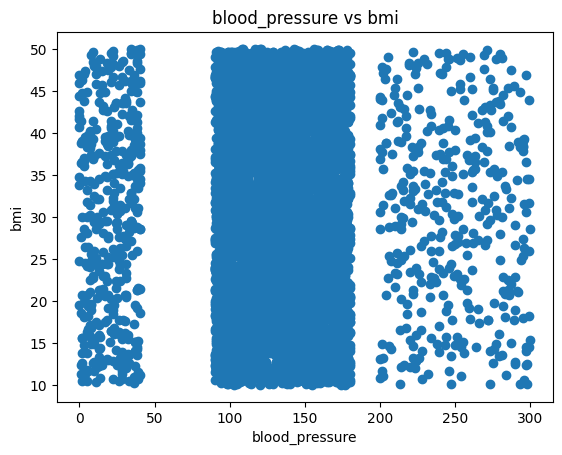

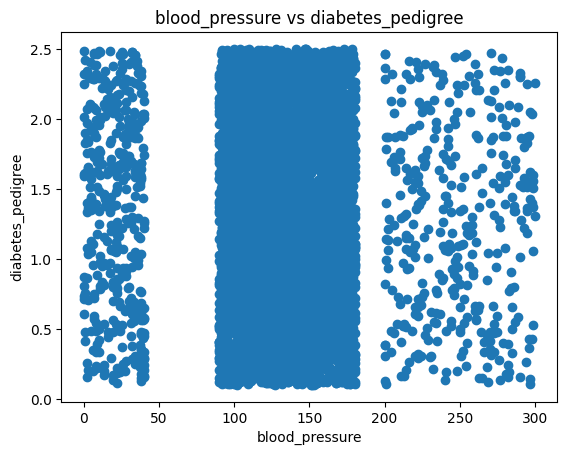

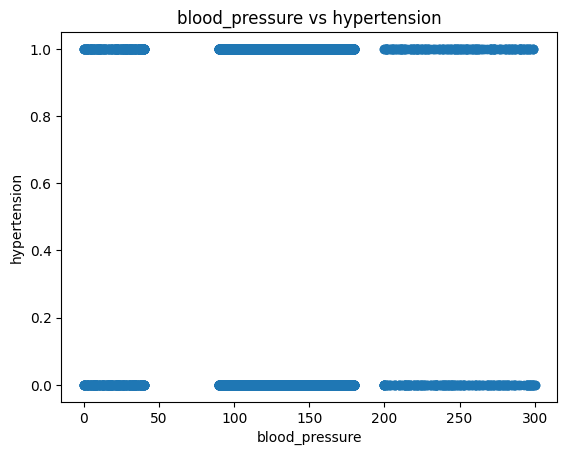

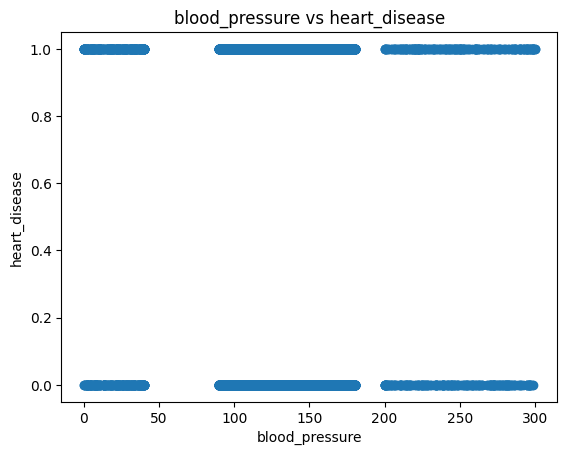

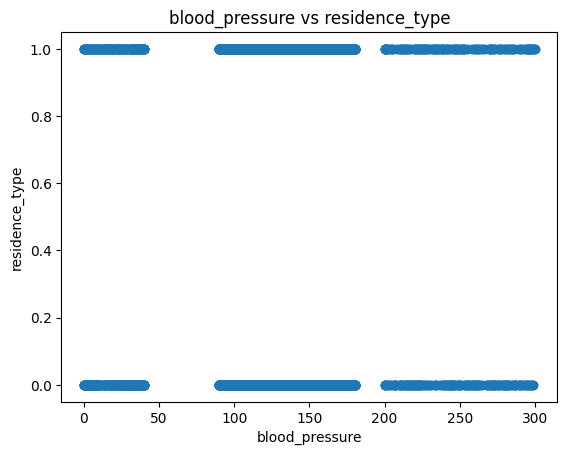

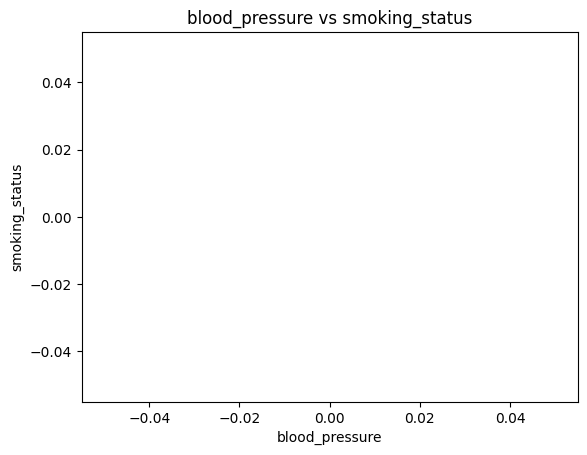

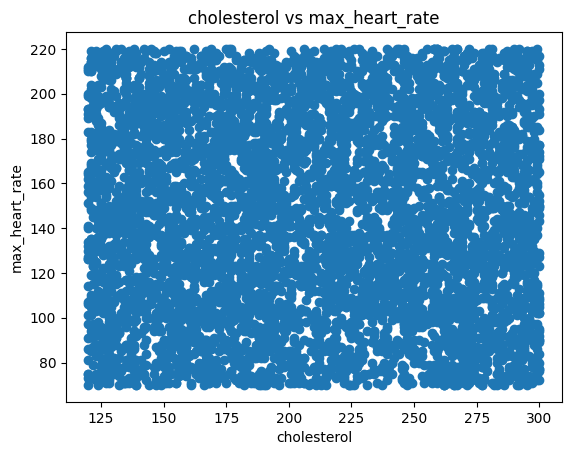

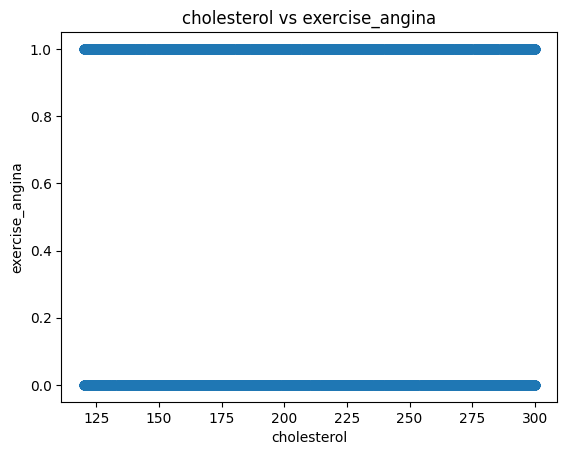

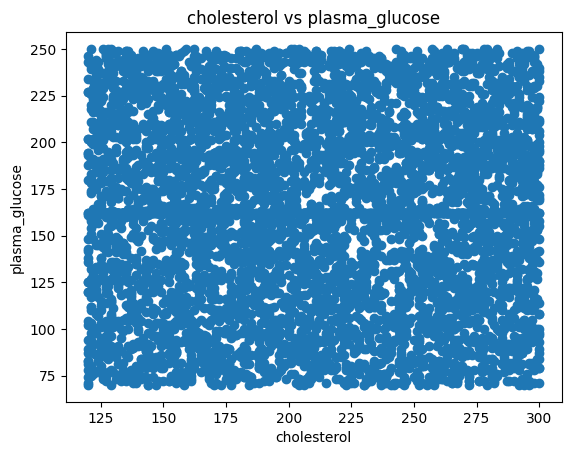

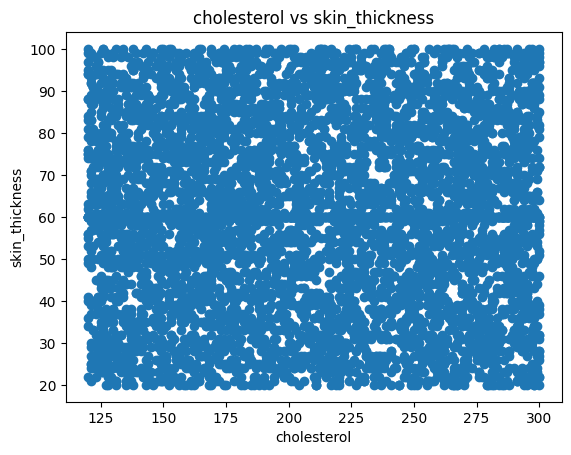

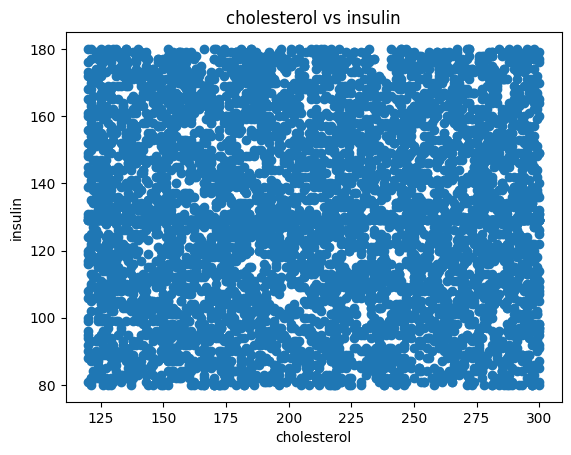

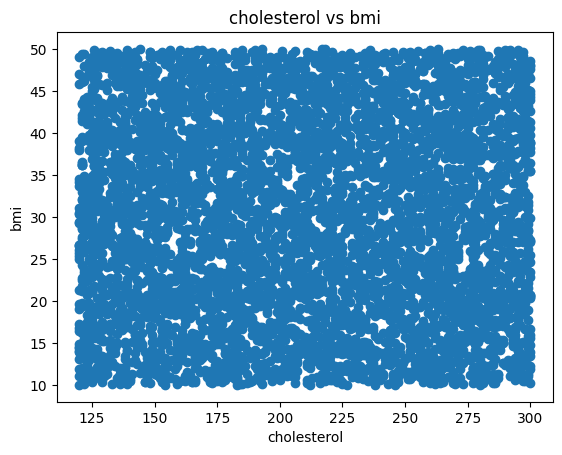

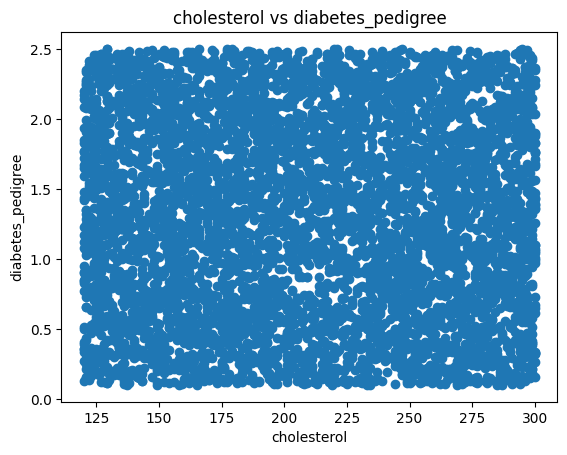

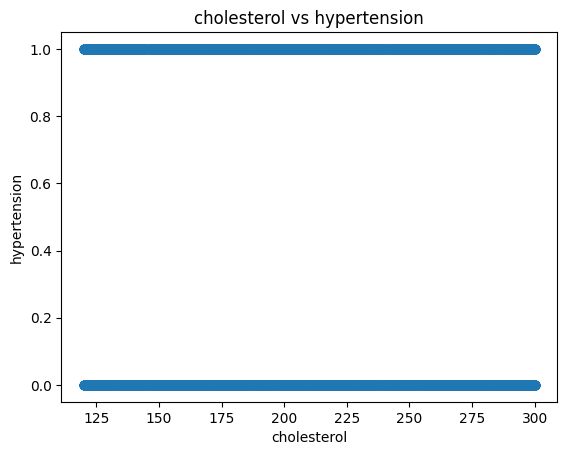

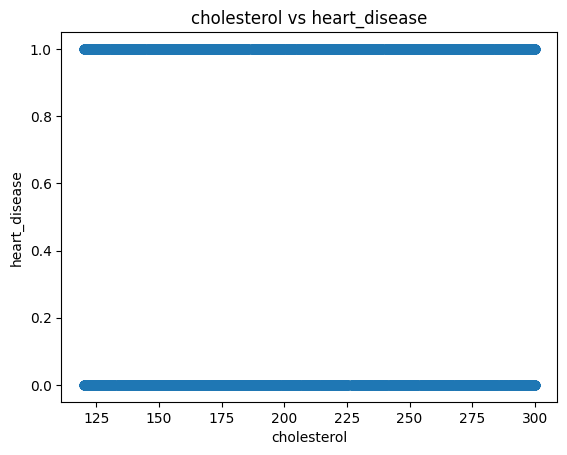

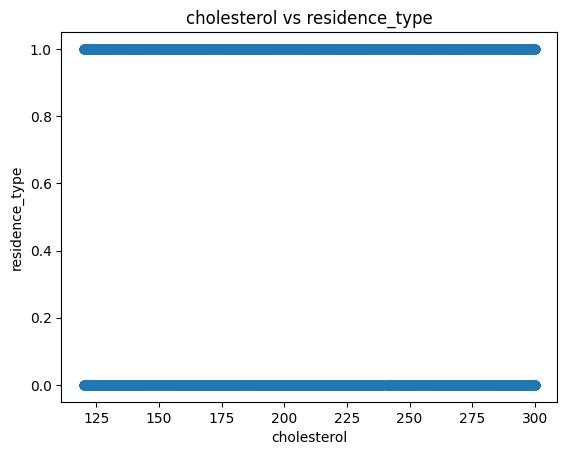

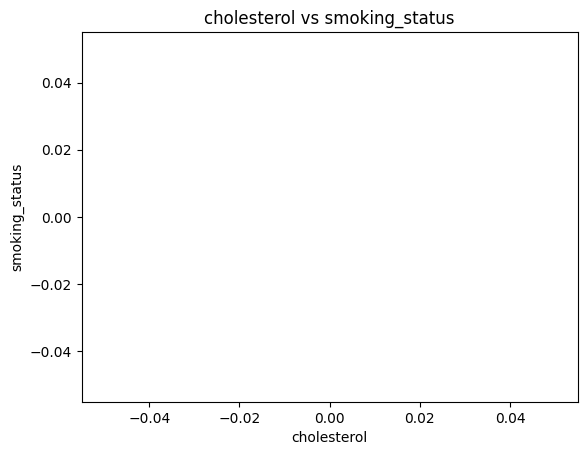

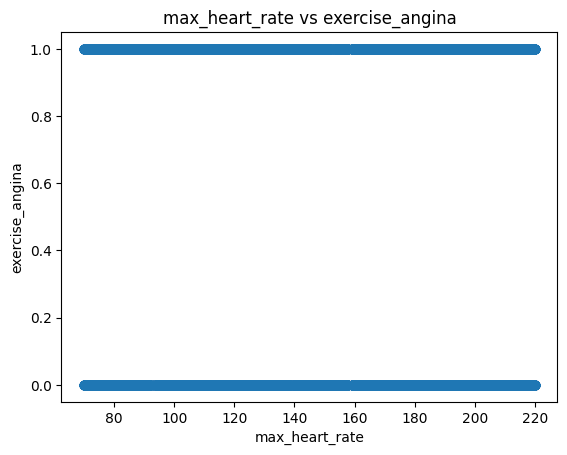

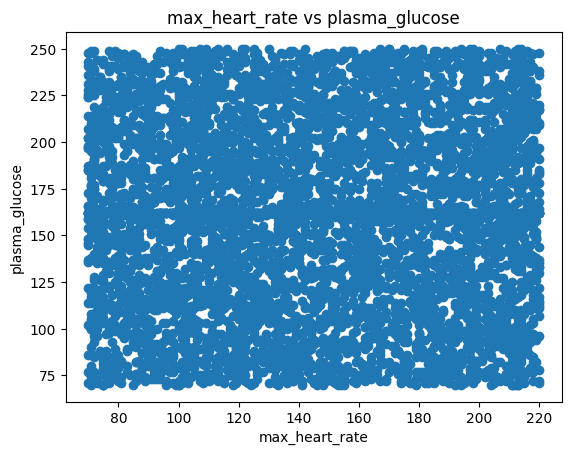

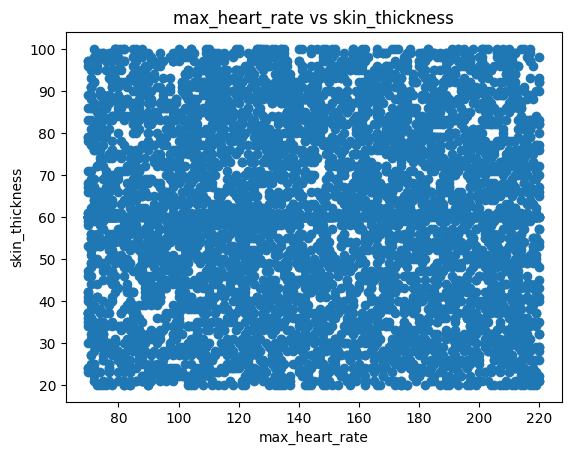

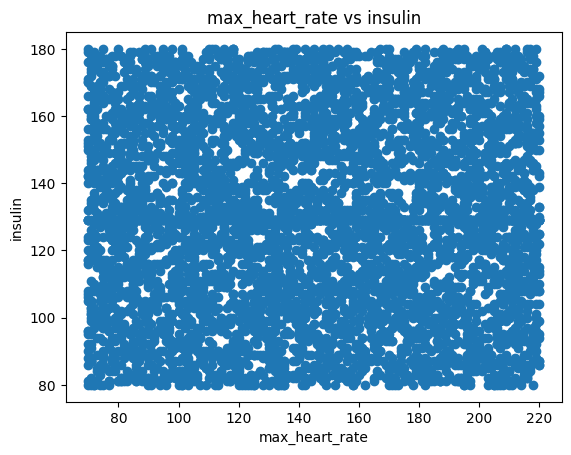

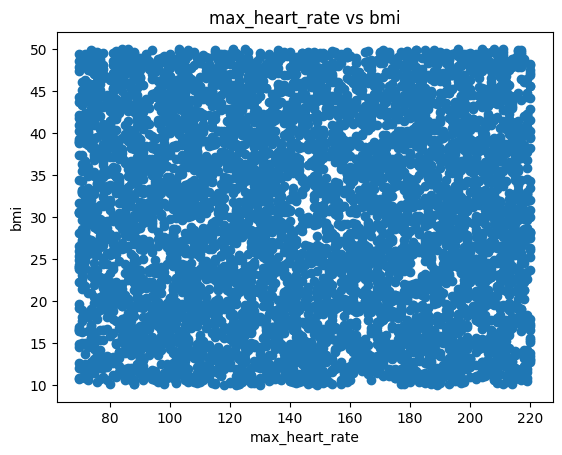

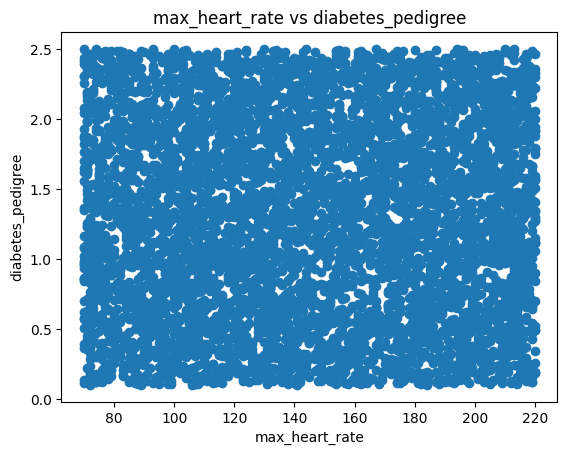

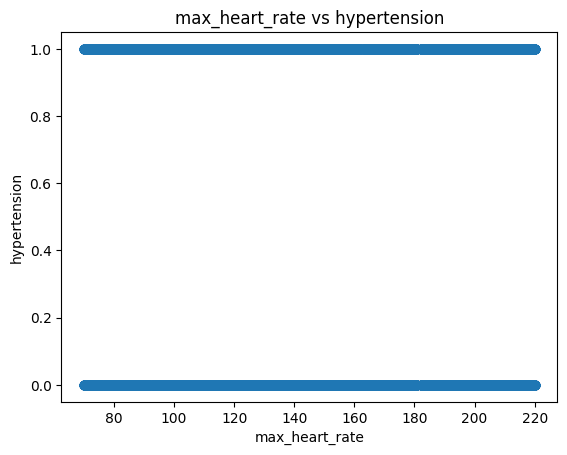

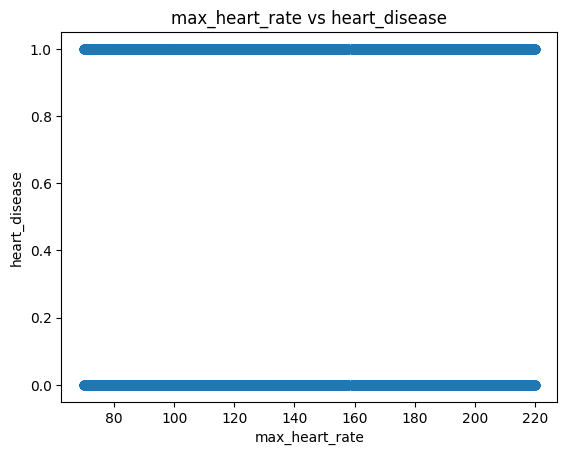

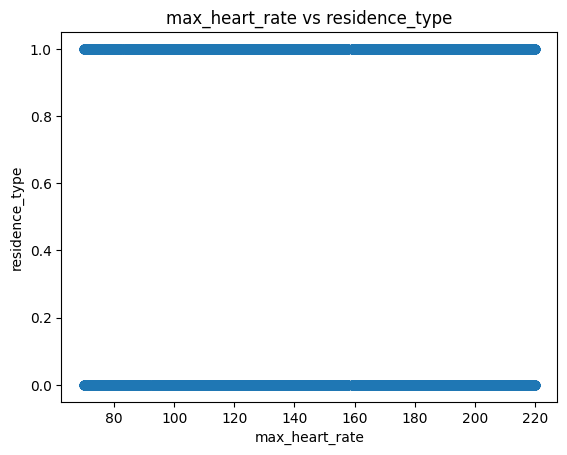

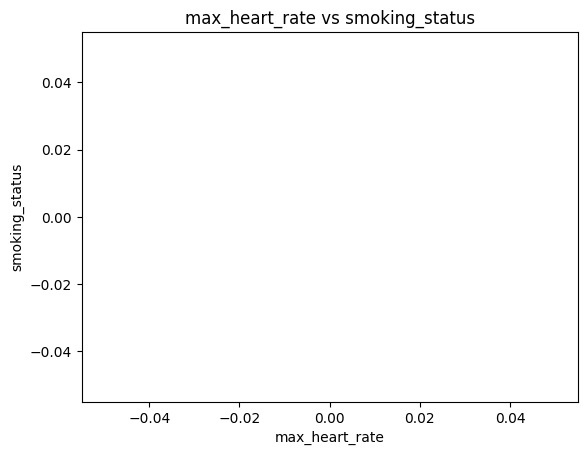

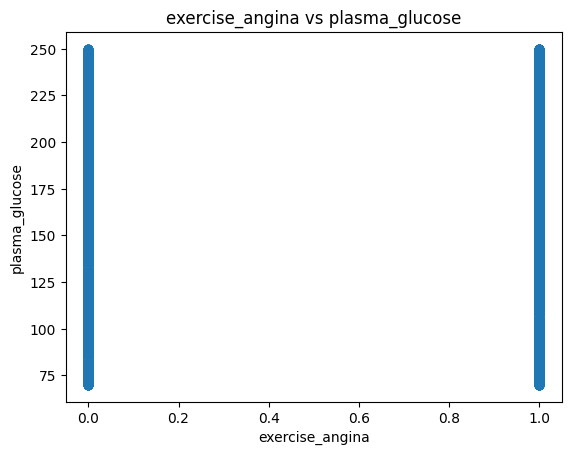

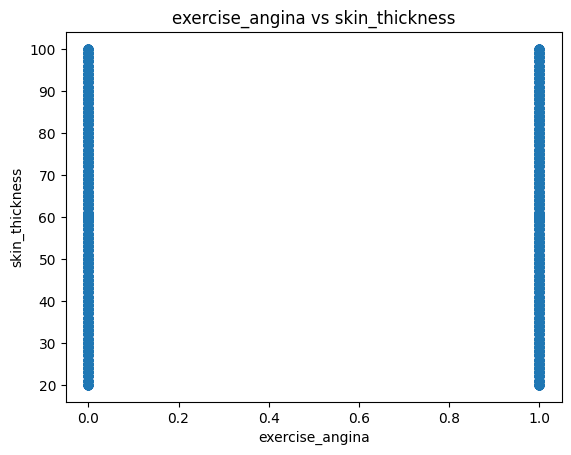

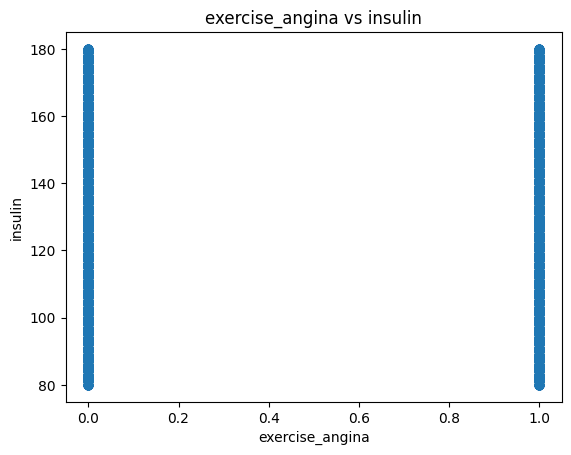

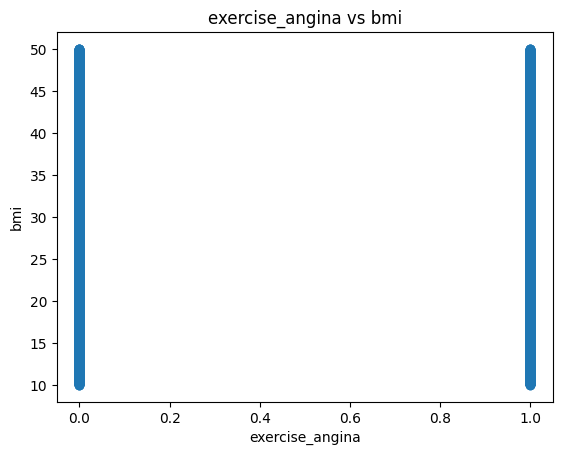

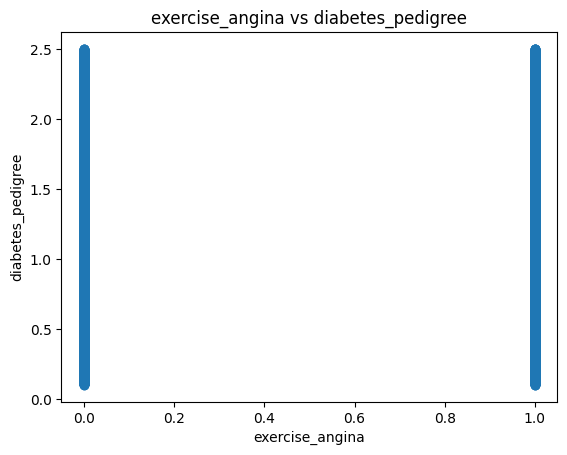

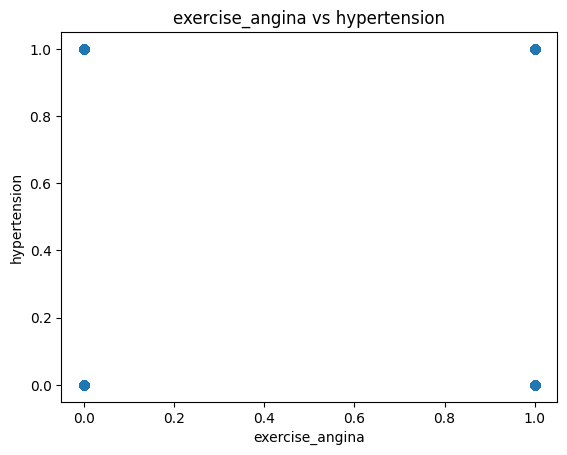

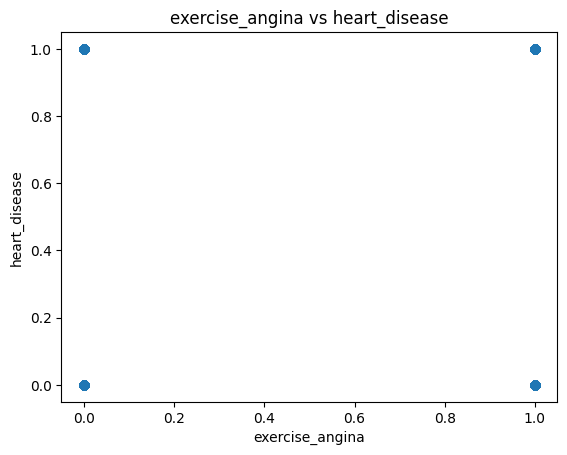

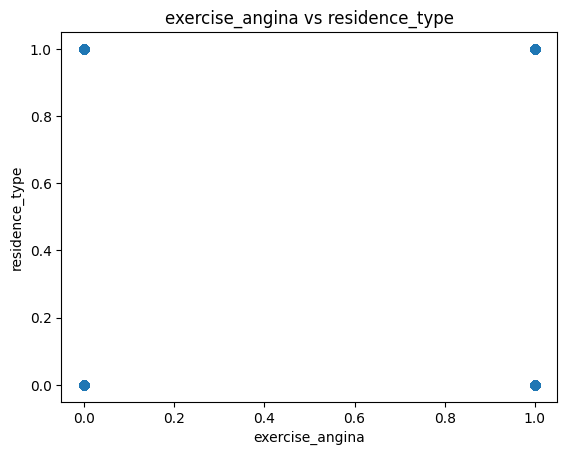

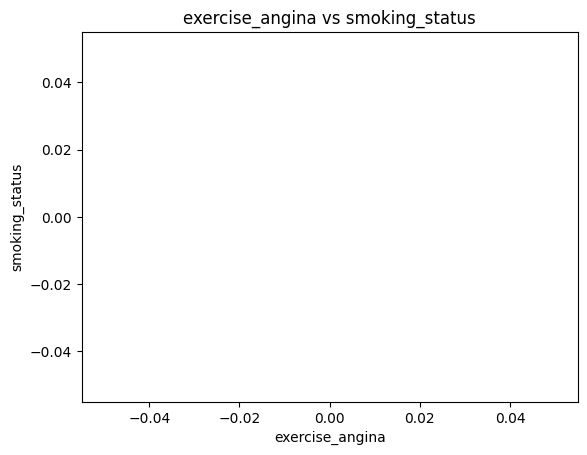

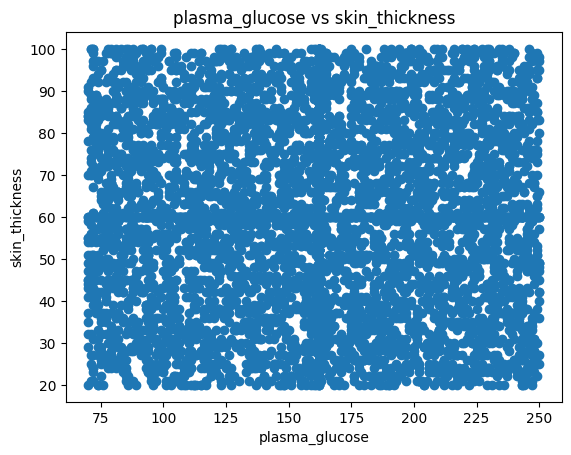

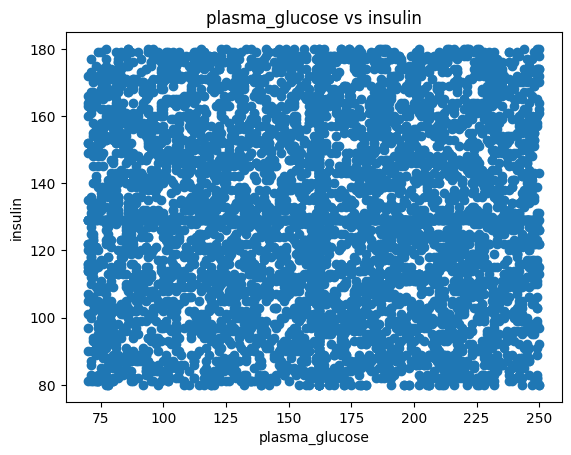

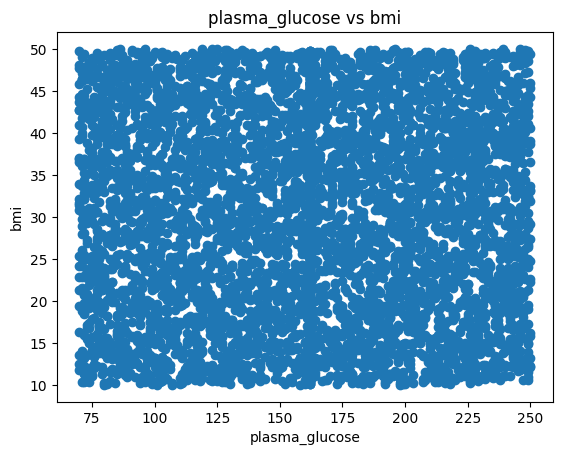

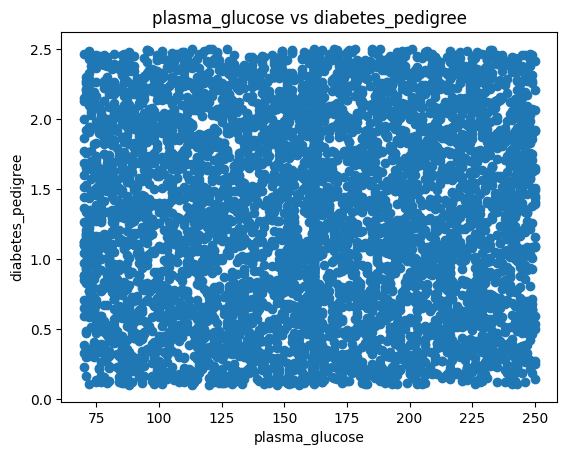

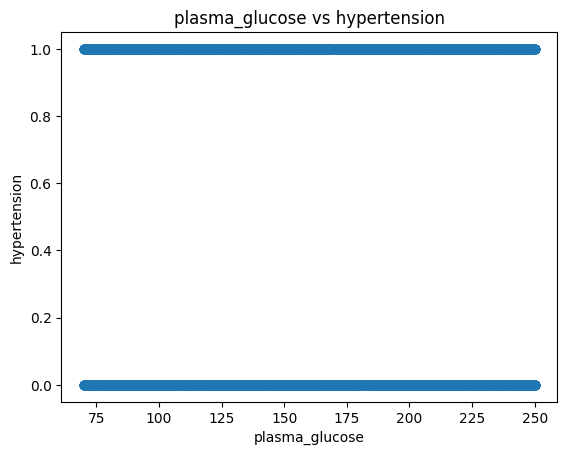

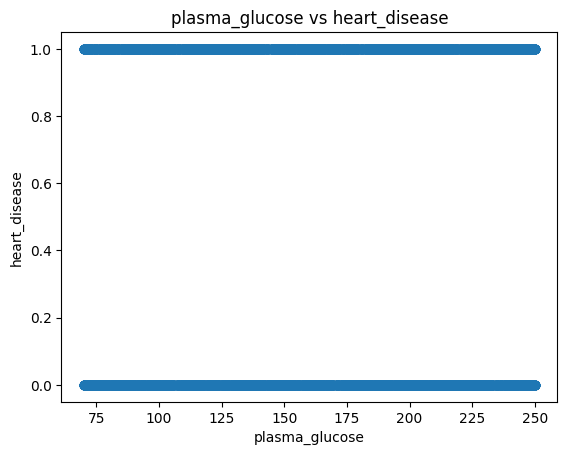

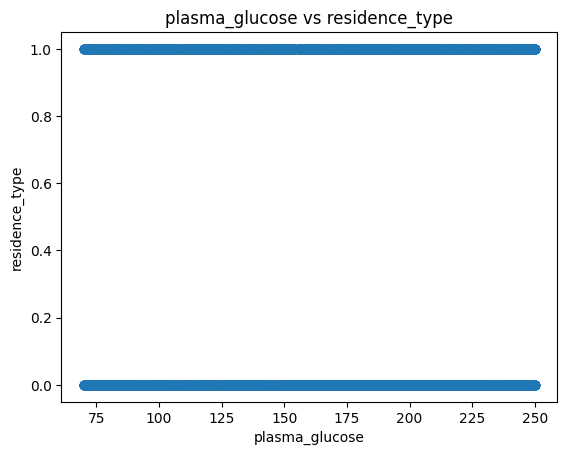

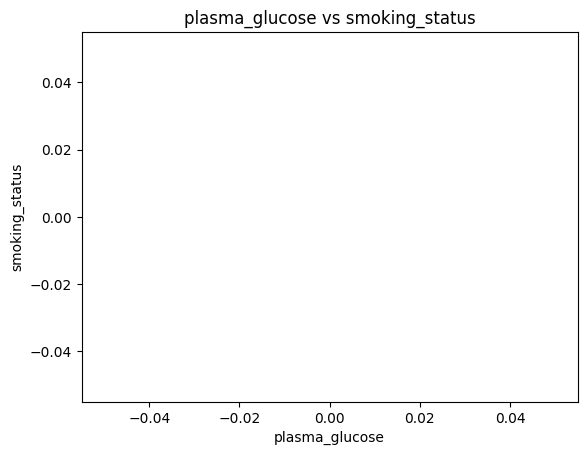

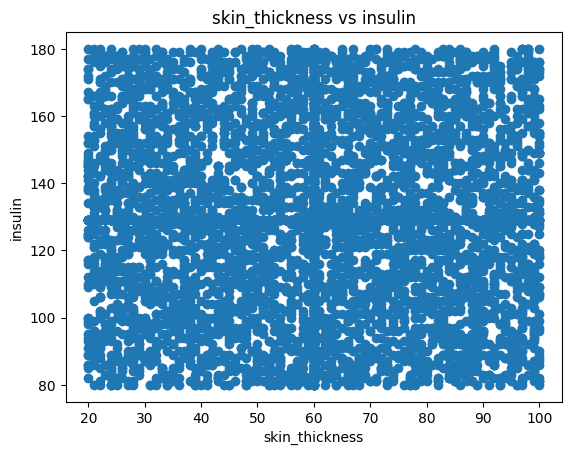

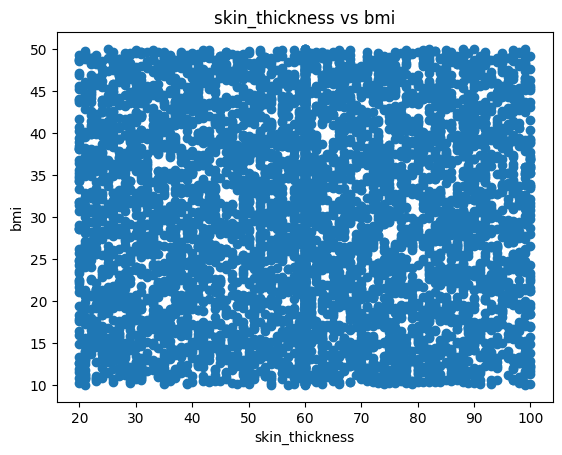

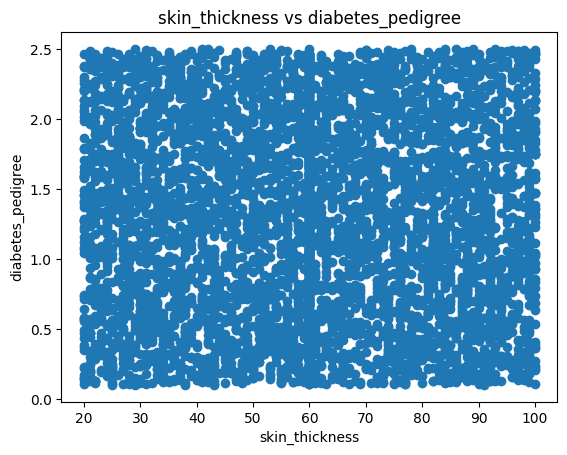

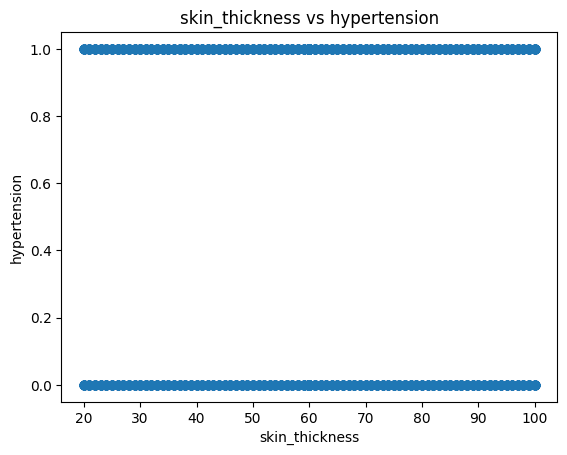

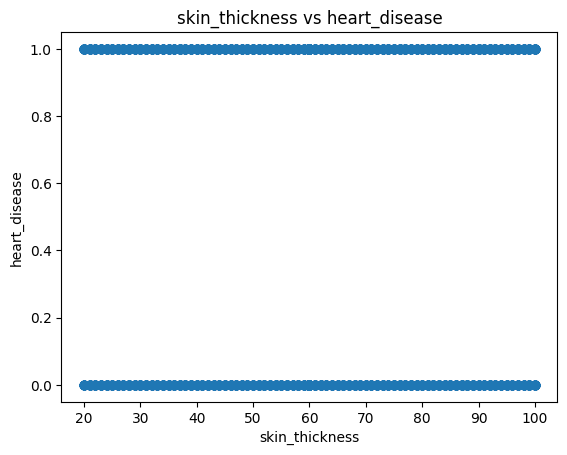

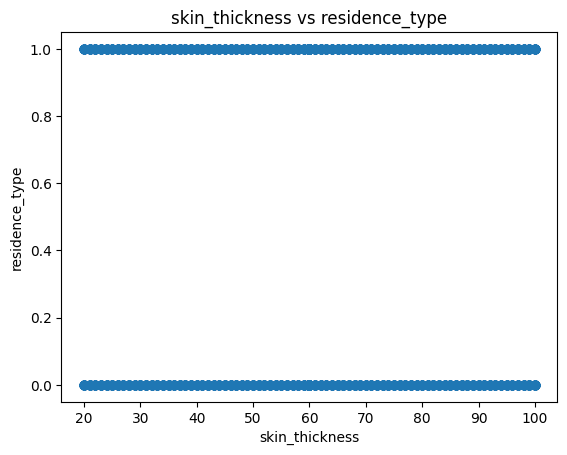

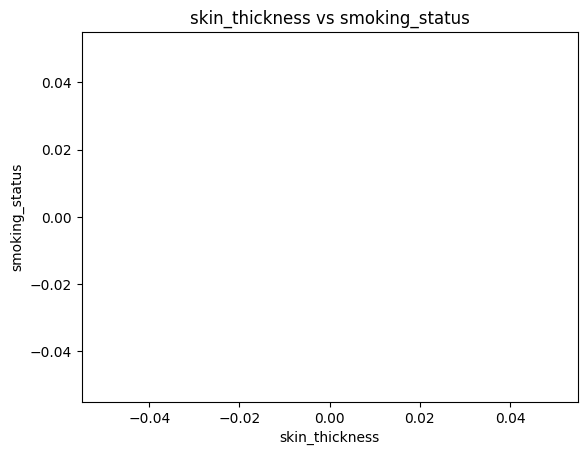

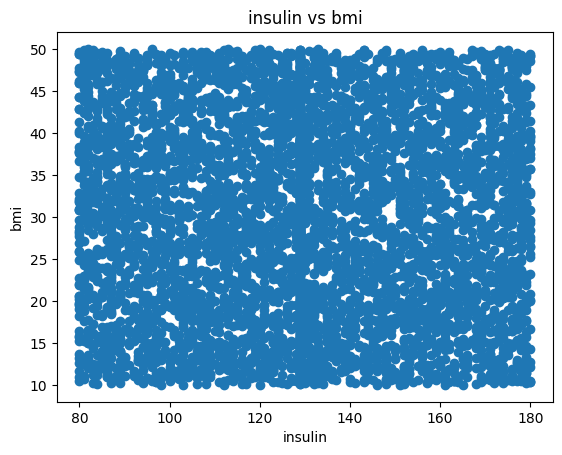

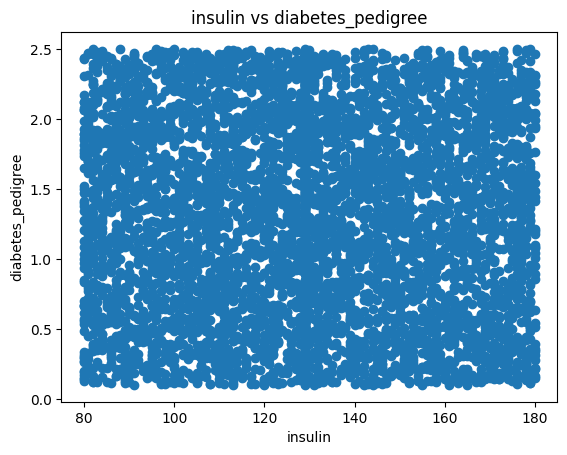

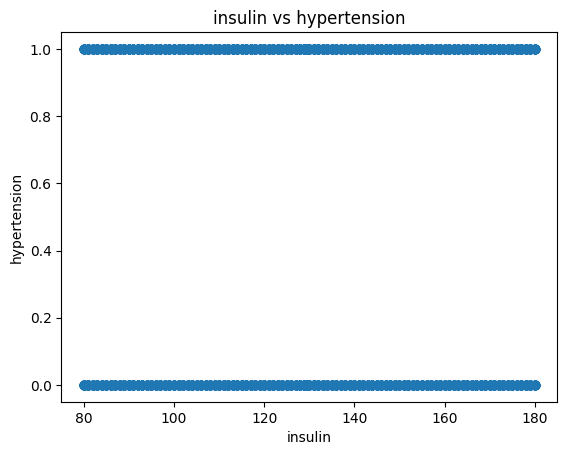

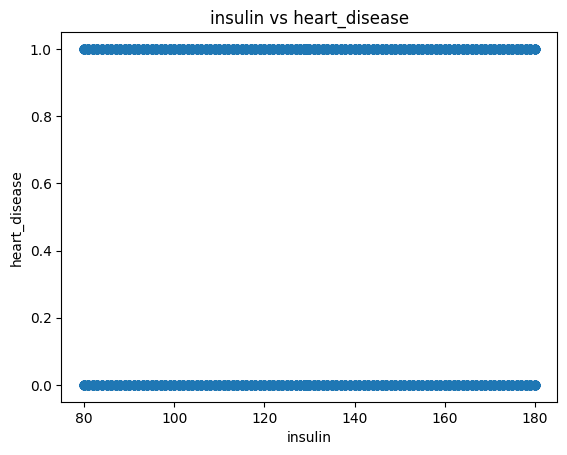

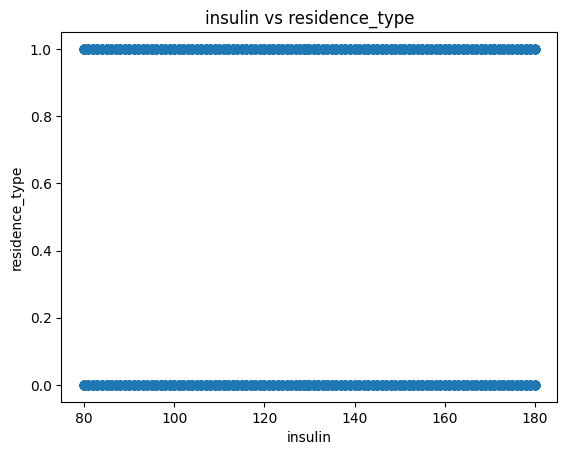

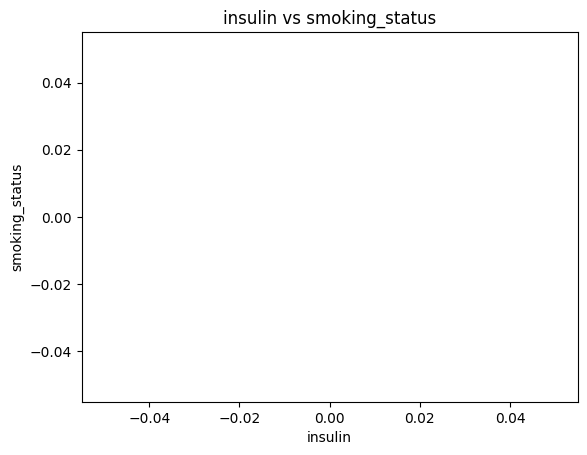

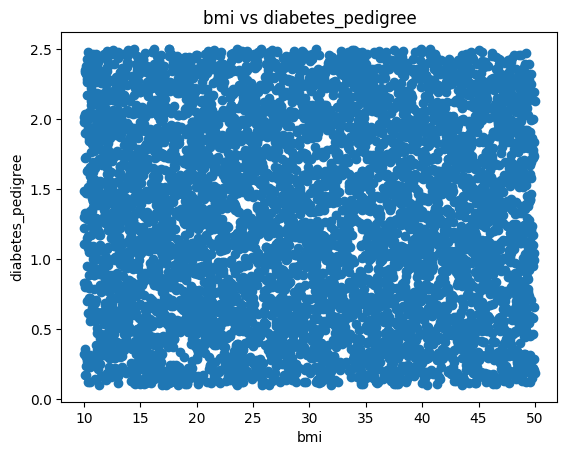

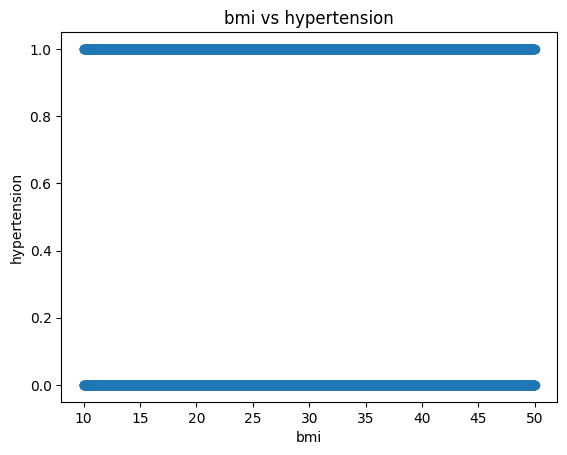

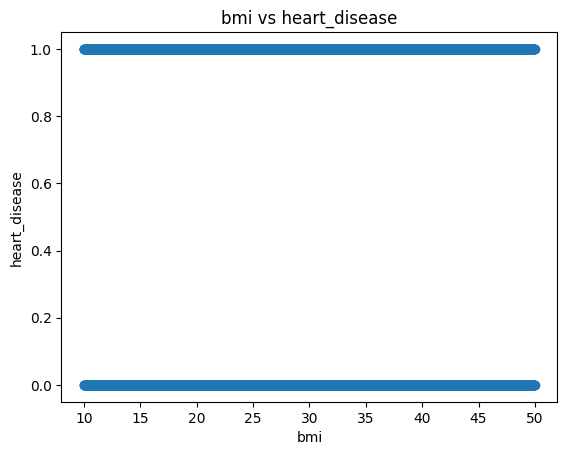

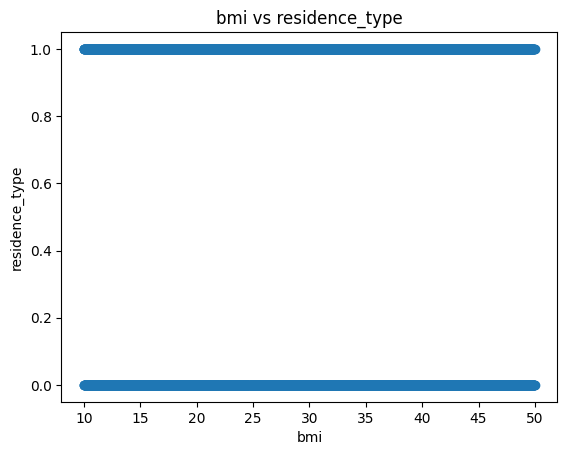

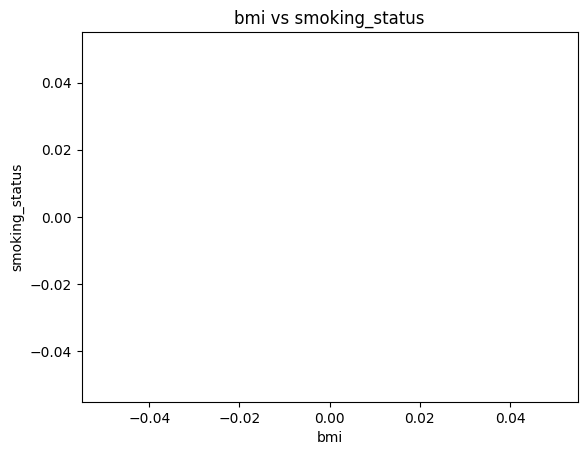

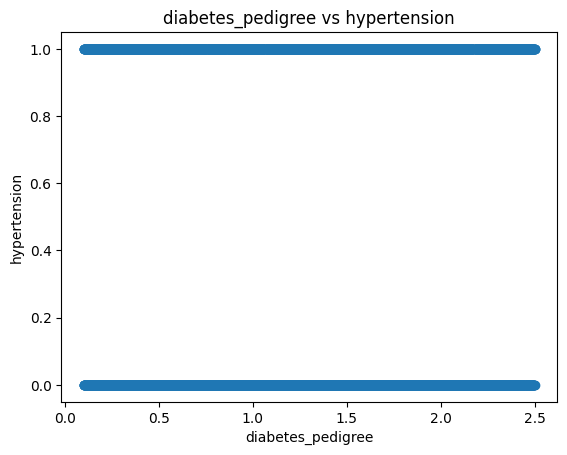

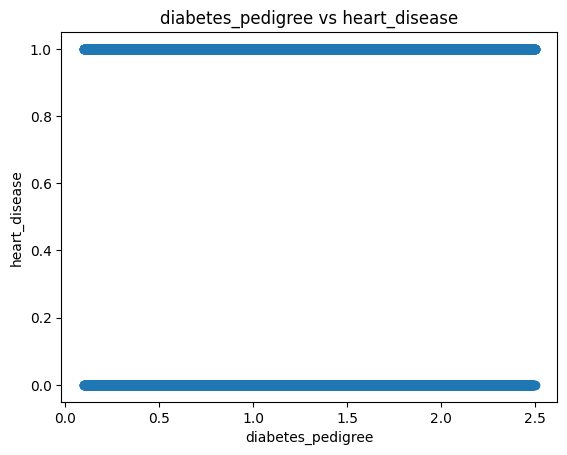

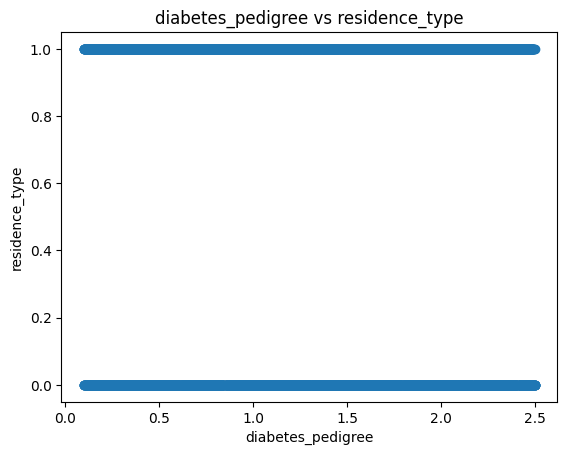

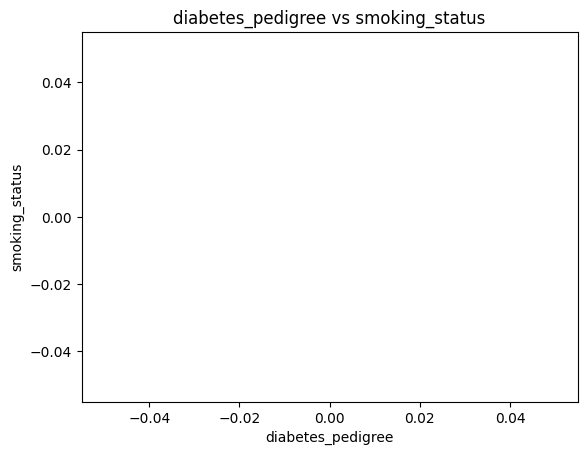

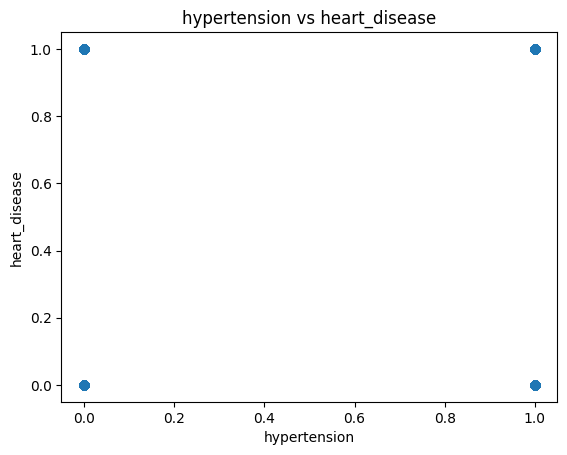

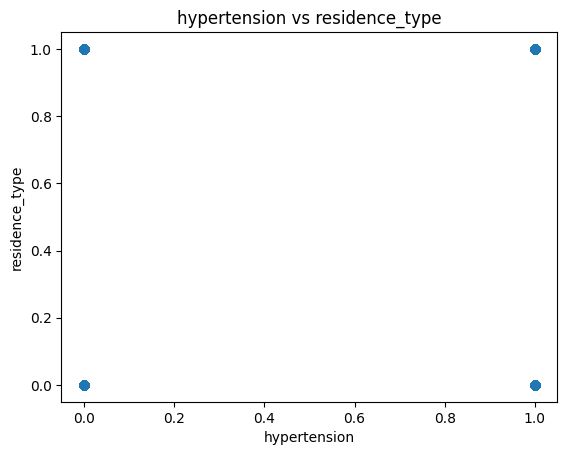

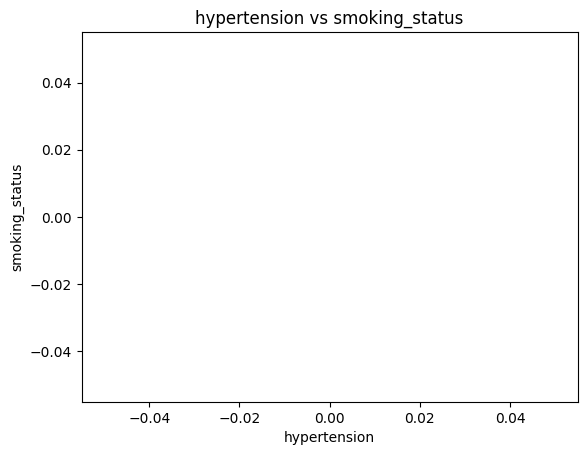

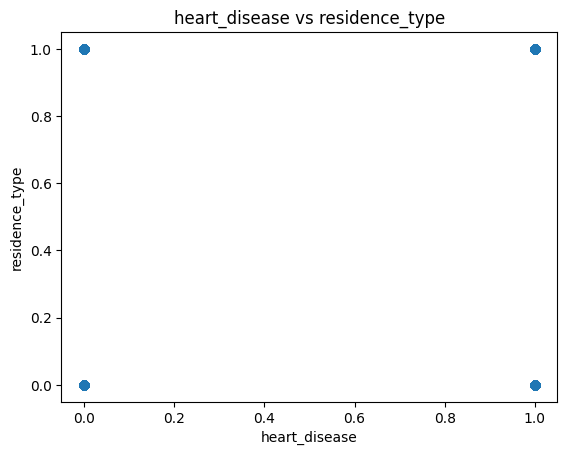

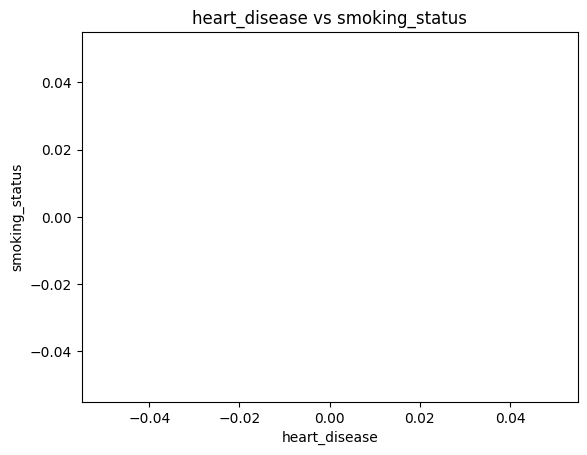

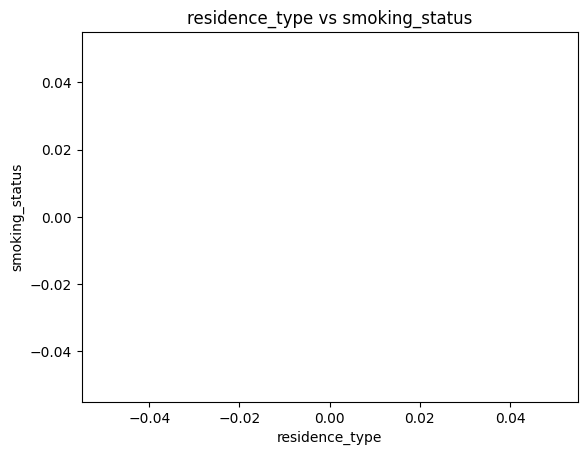

In [24]:
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        plt.scatter(data[columns[i]], data[columns[j]])
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.title(f"{columns[i]} vs {columns[j]}")
        plt.show()


In [33]:
data.head(2)

age  gender  chest_pain_type  blood_pressure  cholesterol  max_heart_rate  \
0   24     1.0                4             250          139             212   
1   29     0.0                4             132          187             147   

   exercise_angina  plasma_glucose  skin_thickness  insulin        bmi  \
0                0           108.0            33.0    109.0  37.999303   
1                0           202.0            42.0    129.0  25.588346   

   diabetes_pedigree  hypertension  heart_disease  residence_type  \
0           0.480277             1              1               0   
1           0.283986             1              1               0   

   smoking_status  cluster  
0             NaN        0  
1             NaN        2

In [37]:
x = data[["blood_pressure","plasma_glucose"]]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)
# Display scaled data
print(pd.DataFrame(data_scaled, columns=x.columns).head())

   blood_pressure  plasma_glucose
0        2.395969       -1.070635
1       -0.047147        0.820768
2        2.830761       -0.245661
3       -0.668278       -1.130999
4       -0.896027        0.015916


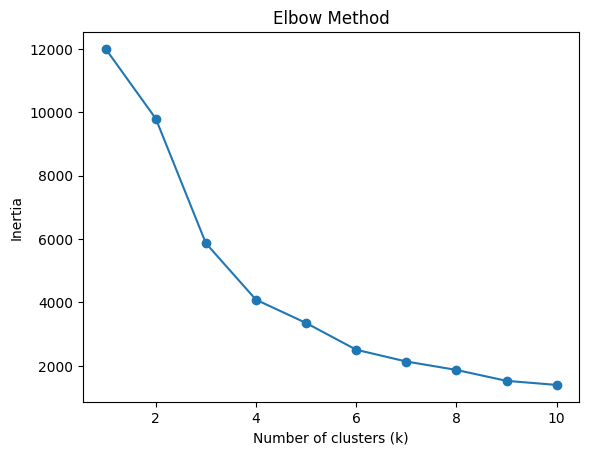

In [38]:
# Use the Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [46]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

print(data.head())

   age  gender  chest_pain_type  blood_pressure  cholesterol  max_heart_rate  \
0   24     1.0                4             250          139             212   
1   29     0.0                4             132          187             147   
2   46     0.0                3             271          185             193   
3   73     0.0                2             102          200             125   
4   49     1.0                3              91          163             192   

   exercise_angina  plasma_glucose  skin_thickness  insulin        bmi  \
0                0           108.0            33.0    109.0  37.999303   
1                0           202.0            42.0    129.0  25.588346   
2                0           149.0            43.0    102.0  37.892029   
3                0           105.0            77.0    165.0  18.660241   
4                0           162.0            31.0    170.0  12.767980   

   diabetes_pedigree  hypertension  heart_disease  residence_type  \
0    

In [47]:
# Calculate Silhouette Score
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.4277996385153754


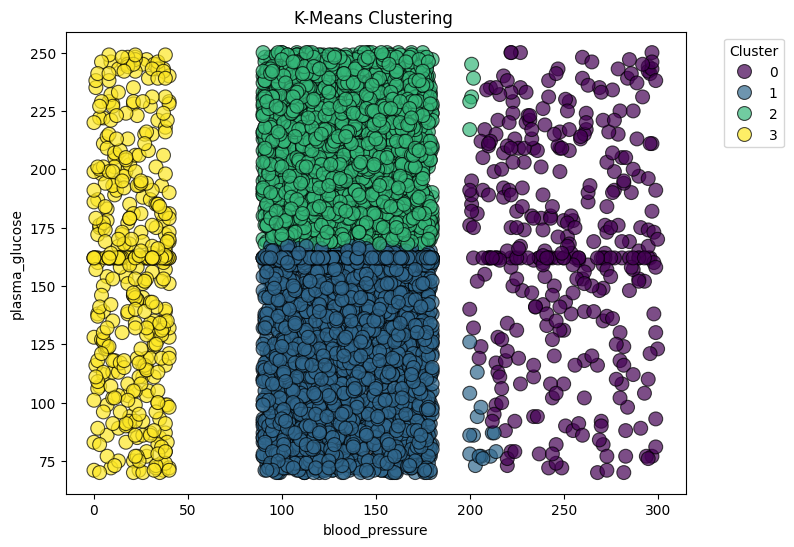

In [48]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='blood_pressure', y='plasma_glucose', hue='cluster', 
                data=data, palette='viridis', s=100, alpha=0.7, edgecolor='k')

plt.title('K-Means Clustering ')
plt.xlabel('blood_pressure')
plt.ylabel('plasma_glucose')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()